In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [44]:
train_x = pd.read_csv('UCI HAR Dataset/train/X_train.csv')
train_y = pd.read_csv('UCI HAR Dataset/train/y_train.csv')
train_x.head()
train_y.head()

,5
0,5
1,5
2,5
3,5
4,5


In [3]:
test_x = pd.read_csv('UCI HAR Dataset/test/X_test.csv')
test_y = pd.read_csv('UCI HAR Dataset/test/y_test.csv')
test_y.head()
# test_y.head()

,5
0,5
1,5
2,5
3,5
4,5


In [45]:
train_x = np.array(train_x)
train_y = np.array(train_y)
train_x,train_y = shuffle(train_x,train_y)


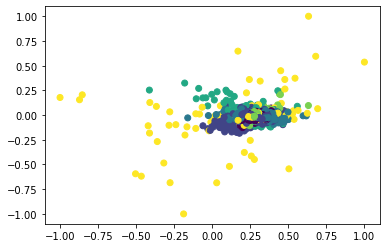

In [59]:
train_y.shape
train_x[0].shape
# plt.figure(figsize=(20,16)
plt.scatter(train_x[:,0],train_x[:,1],c=train_y)
plt.show()

ValueError: operands could not be broadcast together with shapes (6,561) (6,2) 

In [6]:
from sklearn.linear_model import LogisticRegression

In [16]:
classifier = LogisticRegression(max_iter=1000,solver='saga',multi_class='ovr',random_state=42)
train_y = train_y.reshape((-1))
train_y.shape
classifier.fit(train_x,train_y)
y_pred = classifier.predict(test_x)


In [33]:
classifier.fit_intercept
# print(y_pred)

True

In [18]:
classifier.score(test_x,test_y)

0.9619823489477257

In [11]:
from sklearn.metrics import classification_report


In [16]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.97      0.95      0.96       471
           3       0.99      0.97      0.98       420
           4       0.97      0.87      0.92       491
           5       0.90      0.97      0.93       531
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2946
   macro avg       0.96      0.96      0.96      2946
weighted avg       0.96      0.96      0.96      2946



In [37]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_set, y_set = sc.inverse_transform(train_x), train_y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [17]:
from sklearn.linear_model import Perceptron

In [18]:
slp = Perceptron()
slp.fit(train_x,train_y)
y_pred_slp = slp.predict(test_x)


In [21]:
slp.score(test_x,test_y)

0.9395790902919212

In [41]:
plt.show()

In [42]:
sns.set_theme(style="ticks")

g = sns.catplot(x="subject", hue="ActivityName", data=train)

NameError: name 'sns' is not defined